# 데이터로드

뉴해피스테이션 거래내역(NHS_CUST_BUY_HIST) <br>
'21년 2월 1일 ~ 22년 3월 31일 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
# sns.set(rc = {'figure.figsize':(15,8), 'font.serif': font_name})

In [2]:
import pandas as pd
df_nhs = pd.read_csv('sample2.csv', encoding='euckr')
df_nhs['TRADE_CD'] = df_nhs.STOR_CD.apply(lambda x: str(x)) + df_nhs.BUY_DT.apply(lambda x: str(x)[-6:]) +  df_nhs.TRADE_NO.apply(lambda x: str(x).rjust(4,"0"))
df_nhs.sort_values('TRADE_CD', ascending =True)
df_nhs

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,POS_NO,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST,TRADE_CD
0,3000,1000772708,20210426,72004,대전유성,8,9,1,N85715,미니 아이스 모찌(VBS/GT/MG),N85715,720042104260009
1,3000,1000772708,20210426,72004,대전유성,8,9,2,N80002,더블주니어컵,"N80002,A50554,A50135",720042104260009
2,3000,1009980392,20210731,62055,부천옥길트레이더스,7,103,1,N60472,홈런볼 사이에 끼인 초코,N60472,620552107310103
3,3000,1000772708,20210426,72004,대전유성,8,9,3,N80002,더블주니어컵,"N80002,A50685,A50410",720042104260009
4,3000,1009980392,20210731,62055,부천옥길트레이더스,7,103,2,N60633,아이스 롤케이크 체리초코,N60633,620552107310103
...,...,...,...,...,...,...,...,...,...,...,...,...
14549937,3000,1036596562,20220319,1255C,신방화역,8,27,3,N87671,아이스 모찌 초코바닐라,N87671,1255C2203190027
14549938,3000,1036596562,20220319,1255C,신방화역,8,27,4,N84838,아이스마카롱 쿠키앤크림,N84838,1255C2203190027
14549939,3000,1036603141,20220319,72003,포항초곡,8,6,1,N80010,쿼터,"N80010,A56087,A52420,A51940,A50842",720032203190006
14549940,3000,1036604274,20220319,126A4,시흥목감,7,25,1,N80009,파인트,"N80009,A59964,A56089,A56024",126A42203190025


## 코드- 이름 변환용 딕셔너리 생성

In [3]:
import os
path = './dataset/ref/'
files = os.listdir(path)
filenames = [os.path.join(path,c) for c in files]
file_dic = pd.concat([pd.read_csv(c, encoding = 'euckr') for c in filenames]).reset_index(drop=True)
file_dic.ITEM_NM = file_dic.ITEM_NM.apply(lambda x: x.strip()).apply(lambda x: x.replace('\u3000',''))
nm = file_dic.ITEM_NM
cd = file_dic.ITEM_CD
item_dic = {cd_c:nm_c for cd_c, nm_c in zip(cd,nm)}

## 기준정보 정리

In [4]:
# 사이즈별 제품을 신규 카데고리로 생성
target1 = ['싱글','더블','파인트','쿼터','패밀리','하프갤론'] 
target2 = ['와츄원','케이크']
my_list1 = [list(df_nhs[df_nhs.ITEM_NM.str.contains(c)]['ITEM_NM'].unique()) for c in target1]
my_list2 = [list(df_nhs[df_nhs.ITEM_NM.str.contains(c)]['ITEM_NM'].unique()) for c in target2]

t1 = []
t2 = []
for e1 in my_list1:
    t1 += e1

for e2 in my_list2:
    t2 += e2
    
rm_2 = ['(R)와츄원쉐이크NEWBI[5.1]',
  '(L)와츄원쉐이크NEWBI[5.9]',
  '(R)와츄원쉐이크[5.4]',
  '(L)와츄원쉐이크[6.2]',
   '(R)와츄원쉐이크[5.1]',
   '(L)와츄원쉐이크NEWBI[6.2]',
   '(L)와츄원쉐이크[5.9]',
   '이달의음료(와츄원쉐이크)[5.1]',
   '(R)와츄원쉐이크NEWBI[5.4]',
    '이달의음료(와츄원쉐이크)[5.4]',
   '(L)버블와츄원쉐이크[7.1]',
   '(R)버블와츄원쉐이크[6.3]',
    '레디팩 (뉴욕 치즈 케이크)',
  '블록팩 (뉴욕치즈케이크)',
   '뉴욕 치즈케이크 레디팩',
    '레디팩(뉴욕 치즈케이크)']
[t2.remove(c) for c in rm_2]

df_nhs['ITEM_TYPE1'] =0
df_nhs['ITEM_TYPE2'] =0

for c1 in t1: 
    df_nhs.loc[df_nhs['ITEM_NM'] == c1, 'ITEM_TYPE1'] = c1
    
for c2 in t2:
    df_nhs.loc[df_nhs['ITEM_NM'] == c2, 'ITEM_TYPE2'] = c2
    
df_nhs

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,POS_NO,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST,TRADE_CD,ITEM_TYPE1,ITEM_TYPE2
0,3000,1000772708,20210426,72004,대전유성,8,9,1,N85715,미니 아이스 모찌(VBS/GT/MG),N85715,720042104260009,0,0
1,3000,1000772708,20210426,72004,대전유성,8,9,2,N80002,더블주니어컵,"N80002,A50554,A50135",720042104260009,더블주니어컵,0
2,3000,1009980392,20210731,62055,부천옥길트레이더스,7,103,1,N60472,홈런볼 사이에 끼인 초코,N60472,620552107310103,0,0
3,3000,1000772708,20210426,72004,대전유성,8,9,3,N80002,더블주니어컵,"N80002,A50685,A50410",720042104260009,더블주니어컵,0
4,3000,1009980392,20210731,62055,부천옥길트레이더스,7,103,2,N60633,아이스 롤케이크 체리초코,N60633,620552107310103,0,아이스 롤케이크 체리초코
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14549937,3000,1036596562,20220319,1255C,신방화역,8,27,3,N87671,아이스 모찌 초코바닐라,N87671,1255C2203190027,0,0
14549938,3000,1036596562,20220319,1255C,신방화역,8,27,4,N84838,아이스마카롱 쿠키앤크림,N84838,1255C2203190027,0,0
14549939,3000,1036603141,20220319,72003,포항초곡,8,6,1,N80010,쿼터,"N80010,A56087,A52420,A51940,A50842",720032203190006,쿼터,0
14549940,3000,1036604274,20220319,126A4,시흥목감,7,25,1,N80009,파인트,"N80009,A59964,A56089,A56024",126A42203190025,파인트,0


In [5]:
print(f"총 {len(df_nhs.loc[df_nhs['ITEM_TYPE2'] != 0, 'ITEM_NM'].unique())}개의 케이크 판매")

총 80개의 케이크 판매


판매 상위 20위 케이크

74_골라먹는 와츄원(L1)       33451
37_해피 버스데이 케이크        27044
58_나눠먹는 큐브 와츄원(K3)    16378
45_나눠먹는 와츄원(L1)       14886
49_바로먹는 와츄원 (L1)      14187
Name: ITEM_NM, dtype: int64


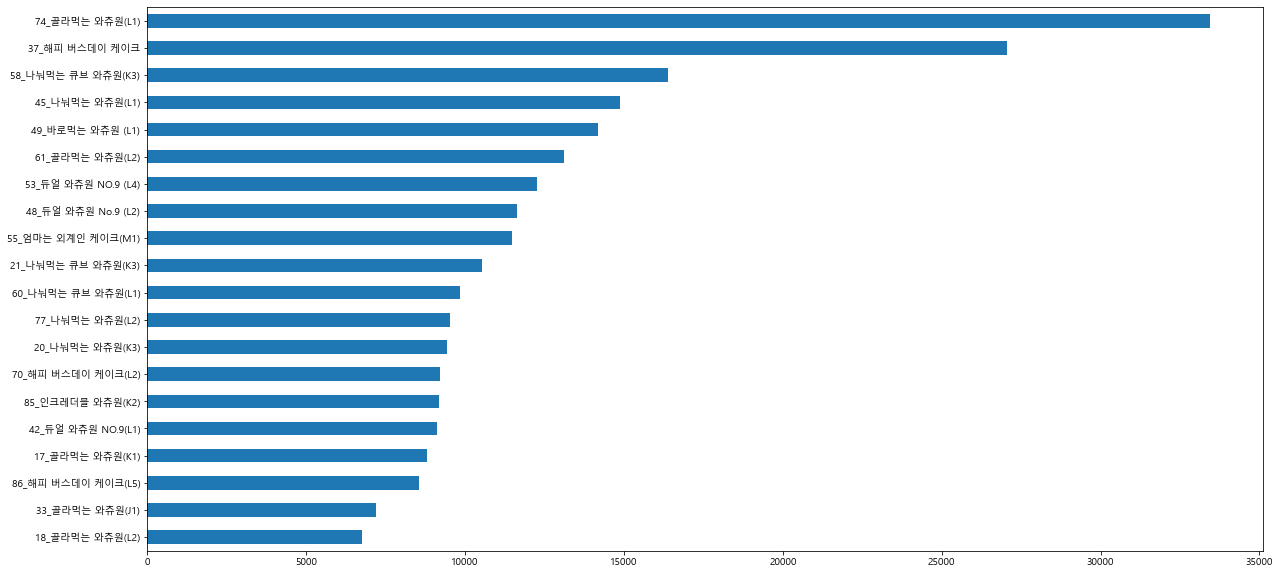

In [6]:
df_nhs.loc[df_nhs['ITEM_TYPE2'] != 0, 'ITEM_NM'].value_counts()[:20].sort_values(ascending =True).plot.barh(figsize=(20,10))
print(df_nhs.loc[df_nhs['ITEM_TYPE2'] != 0, 'ITEM_NM'].value_counts()[:5].sort_values(ascending =False))

74_골라먹는 와츄원(L1)  : 체리쥬빌레 , 레인보우 샤베트 , NEW 슈팅스타 , 베리베리 스트로베리 , 아몬드 봉봉 , 엄마는 외계인 , 블루베리 치즈케이크 , 체리 , 민트 , 솜사탕 , 트리플 초콜릿 <br>
<img src="http://www.baskinrobbins.co.kr/upload/product/1667973001.png" width="300" height="300"></img>
<br>
37_해피 버스데이 케이크 : 엄마는 외계인,아몬드봉봉,민트초콜릿칩,베리베리스트로베리,뉴욕치즈케이크,해피버스데이,체리쥬빌레<br>
<img src="http://www.baskinrobbins.co.kr/upload/product/1639099197.png" width="300" height="300"></img>
<br>
<br>58_나눠먹는 큐브 와츄원(K3):체리쥬빌레 , 뉴욕 치즈케이크 , 레인보우 샤베트 , NEW 슈팅스타 , 베리베리 스트로베리 , 아몬드 봉봉 , 쿠키 앤 크림 , NEW 이상한 나라의 솜사탕 , 엄마는 외계인 , 블루베리 치즈케이크 , 바나나 , 체리<br>
<img src="http://www.baskinrobbins.co.kr/upload/product/1667900363.png" width="300" height="300"></img>
<br>45_나눠먹는 와츄원(L1) : 민트초콜릿칩,베리베리스트로베리,블루베리 치즈케이크,슈팅스타, 아몬드봉봉, 체리쥬빌레,쿠키앤크림,뉴욕치즈케이크<br>
<img src="http://www.baskinrobbins.co.kr/upload/xmas_2018/product/1589126171.jpg" width="300" height="300"></img><br>
<br>49_바로먹는 와츄원 (L1) : 초콜릿 무스 , 체리쥬빌레 , 뉴욕 치즈케이크 , 레인보우 샤베트 , NEW 슈팅스타 , 베리베리 스트로베리 , 아몬드 봉봉 , 31요거트 , 쿠키 앤 크림 , 엄마는 외계인 , 바나나<br>
<img src="http://www.baskinrobbins.co.kr/upload/product/1648773836.png" width="300" height="300"></img>

판매 하위 20위 케이크

베이크드 치즈케이크              3
39_우유속에 끼인 소보로 케이크      5
73_사랑에 빠진 외계인 케이크       9
32_미니 아이스 치즈케이크        13
87_딸기 생크림 케이크          15
10_퍼즐 와츄원              24
조커 아이스 롤케이크            71
82_엄마는 외계인 케이크(K1)     76
34_미니 해피 버스데이 케이크     128
50_미니 골라먹는 와츄원        162
Name: ITEM_NM, dtype: int64


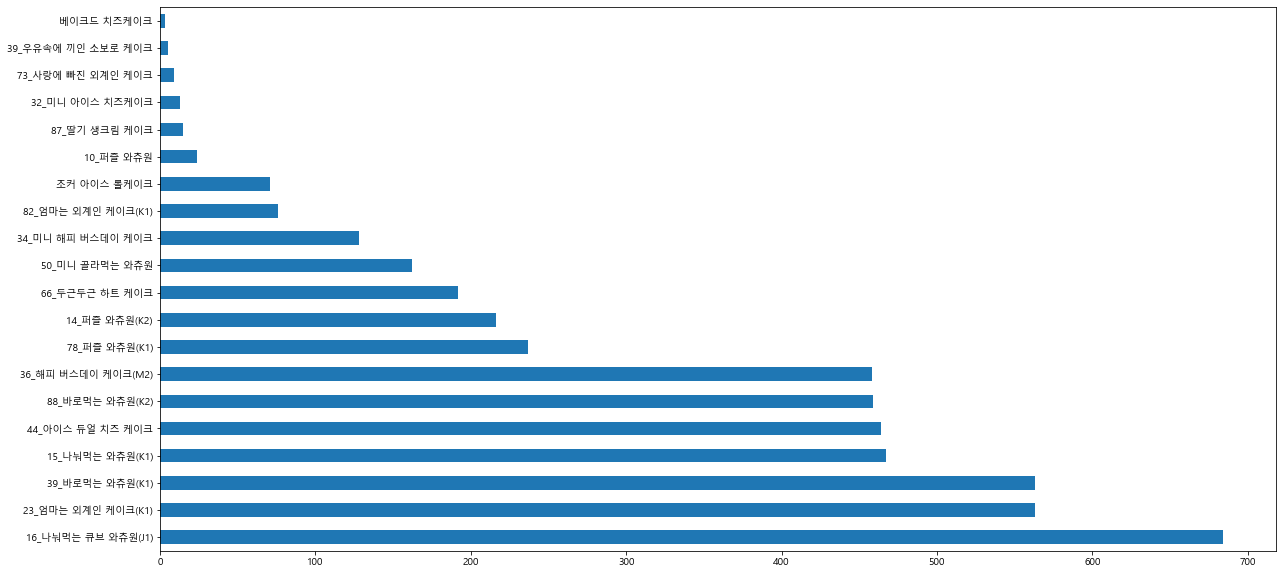

In [7]:
df_nhs.loc[df_nhs['ITEM_TYPE2'] != 0, 'ITEM_NM'].value_counts()[-20:].sort_values(ascending =False).plot.barh(figsize=(20,10))
print(df_nhs.loc[df_nhs['ITEM_TYPE2'] != 0, 'ITEM_NM'].value_counts()[-10:].sort_values(ascending =True))

39_우유속에 끼인 소보로 케이크 : 베리베리스트로베리, 아몬드봉봉, 우유속에끼인소보로, 블루베리치즈케이크, 슈팅스타, 체리쥬빌레, 엄마는외계인, 초콜릿<br>
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMTAxMTBfMTA5/MDAxNjEwMjcwMDE3MTQw.CzxTiK8IlHPPHhfEFH5zLZ5EWgytfN9oOocUlR-zsQAg.hSJEjatRS__o9DKyjK4Lv23EvusvQQVrmC4fXugSO_Yg.JPEG.kimstar1104/1610268691379.jpg?type=w800" width="300" height="300"></img>

87_딸기 생크림 케이크 : 파리크라상의 베스트셀러 딸기 생크림 케이크를 아이스크림으로! 가볍게 즐길 수 있는 미니 케이크 <br>
<img src="http://www.baskinrobbins.co.kr/upload/product/1685844317.png" width="300" height="300"></img>

10_퍼즐 와츄원 : 체리쥬빌레, 뉴욕치즈케이크, 엄마는외계인, 31요거트, 아몬드봉봉, 슈팅스타, 이상한나라의솜사탕, 레인보우샤베트, 베리베리스트로베리<br>
<img src="https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/2886662477/B.jpg?768000000" width="300" height="300"></img>

조커 아이스 롤케이크 : 딸기롤케이크, 피스타치오 <br>
<img src="https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/product/3134806857/B.jpg?295000000" width="300" height="300"></img>

엄마는 외계인 케이크 : 초콜릿 , 민트 초콜릿 칩 , 베리베리 스트로베리 , 아몬드 봉봉 , 쿠키 앤 크림 , 엄마는 외계인 , 블루베리 치즈케이크 , 트리플 초콜릿<br>
<img src="https://www.baskinrobbins.co.kr/upload/product/1682909522.png" width="300" height="300"></img>

## 아이템간 관계도 생성

### 아이템 이중리스트 생성

In [8]:
# 메모리의 문제로 100만건만 추출 사용
item_cd_li = list(df_nhs.ITEM_CD_LIST.str.split(","))[:10000]
# cd = list(set(w for sale in item_cd_li for w in sale))
item_cd_li_nm = []
for idx in range(len(item_cd_li)):
    item_cd_li_nm =  [item_dic[x] for x in item_cd_li[idx]]

# item_cd_li_nm

### 원핫인코딩 테이블 생성

In [9]:
import numpy as np

# 코드 이중리스트 -> 이름 이중리스트로 변경
item_cd_li_nm = []
for idx in range(len(item_cd_li)):
    temp =[]
    for j in range(len(item_cd_li[idx])):
        temp.append(item_dic[item_cd_li[idx][j]])
    item_cd_li_nm.append(temp)
    
# 원핫인코딩 테이블 생성 
nms = list(set(w for c in item_cd_li_nm for w in c)) # 전체항목 리스트 생성
dfs = pd.DataFrame(np.zeros([len(item_cd_li_nm),len(nms)]),columns=nms)
for idx, nm in enumerate(nms):
    dfs.loc[idx,nm] = 1
dfs

,33_골라먹는 와츄원(J1),파티고깔모자(핑크),스틱바 달고나,(H)블랙웨일 카페모카,6번숫자초,아이스마카롱 쿠키앤크림,와플컵[무료],레디팩 (아이스 죠리퐁),팥빙수with밀탑,37_나눠먹는 큐브 와츄원 (J1),...,레디팩 (끼리 크림치즈 앤 스트로베리),37_시크릿 라이언(L1),아이스 모찌 민트 초코 봉봉,로아커 아이스서클,컵_이달의맛더블주니어,오레오 쿠키 앤 크림치즈,37_해피 버스데이 케이크,79_해피 스마일 플라워,카페라떼(H)[3.3],52_ 나눠먹는 와츄원(J2)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 단어쌍 딕셔너리 생성

In [10]:
c_l = nms
w_l = len(nms)
c_d ={}  #동시출현 빈도가 저장될 dict
for idx in range(len(dfs)):
    tmp = dfs.loc[idx] #한줄씩 읽어와서 단어별로 분리
    for i, a in enumerate(c_l):
        for b in tmp[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count[a, b] = count.get((a, b), 0) + 1   #실제로 센다


TypeError: '>' not supported between instances of 'str' and 'float'

In [ ]:
from tqdm import tqdm
c_l = nms
w_l = len(nms)
c_d ={}
for idx in range(len(dfs)):
    tmp = dfs.loc[idx] # 현재문서의 단어 출현 빈도를 가져온다.
    for i, w1 in enumerate(c_l):
        temp = []
        temp.append(w1)
        for j in range(i+1,w_l):
            temp.append(c_l[j])
            c_d[c_l[i],c_l[j]] = c_d.get((c_l[i],c_l[j]),0)+max(tmp[w1],tmp[c_l[j]])

In [ ]:
from tqdm import tqdm
c_l = nms
w_l = len(nms)
c_d ={}
for idx in range(len(dfs)):
    tmp = dfs.loc[idx] # 현재문서의 단어 출현 빈도를 가져온다.
    for i, w1 in enumerate(c_l):
        temp = []
        temp.append(w1)
        for j in range(i+1,w_l):
            temp.append(c_l[j])
            c_d[temp] = c_d.get(tuple(temp),0)+max(tmp[w1],tmp[c_l[j]])

In [121]:
tmp[w1]

0.0

In [110]:
c_d.get(2,

0.0

In [65]:
for i,c in enumerate(dfs.loc[1]):
    print(tmp[i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [50]:
column_list

['01_파티 위드 해피박스',
 '쫀떡궁합',
 '(R)밀카블라스트[4.8]',
 '56_해피데이 카카오 프렌즈(K1)',
 '사랑에 빠진 딸기',
 '오버더레인보우블라스트[4.8]',
 '(L)카푸치노블라스트리얼샷[4.8]',
 '럭키 카라멜 터틀',
 '그린티',
 '쌀떡궁합',
 '해피버스데이',
 '37_시크릿 어피치(L2)',
 '블록팩(초콜릿무스)',
 '13_골라먹는 와츄원(J1)',
 '67_리얼 27큐브(L2)',
 '핑크러브',
 '레인보우 스틱바 세트',
 '85_해피데이 위드 베어',
 '(R)콘푸로스트블라스트[4.5]',
 '꽃안경(핑크)',
 '레디팩(순수(秀) 우유)',
 '(R)민초봉봉블라스트[5.4]',
 '미니 아이스 모찌(VBS/GT/MG)',
 '초콜릿 무스',
 '(R)블랙앤레드빈블라스트[4.0]',
 '아빵 우유',
 '59_스마일 위 러브',
 'D_아메리카노(I)[2.8]',
 '(R)아이스밀크티[2.8]',
 '골든 애플 요거트',
 '83_레인보우 마카롱(K2)',
 '블록팩(엄마는외계인)',
 '아이스 군옥수수맛 아몬드',
 '메이플 월넛',
 '카페라떼(I)[3.3]',
 '오레오 샌드 민트초코칩',
 '와플레귤러콘(전용)',
 '쿠키앤크림',
 '58_나눠먹는 큐브 와츄원(K3)',
 '초콜릿 칩',
 'MyDay안경(블루)',
 '49_바로먹는 와츄원 (L1)',
 '오레오쉐이크[5.4]',
 '레디팩 (민트 초콜릿 칩)',
 '카페31_바닐라빈라떼[5.5]',
 '아이스 호떡',
 '6번숫자초',
 'New 자모카 아몬드 훠지',
 '08_흰 눈 사이로 설렘을 타고',
 '46_해피 버스데이 케이크(L3)',
 '93_듀얼 와츄원 No.9 (J2)',
 '19_해피데이 카카오 프렌즈(K3)',
 '오레오 카푸치노 블라스트[4.8]',
 '(L)수박블라스트[4.5]',
 '(R)밀크쉐이크[5.4]',
 '파티고깔모자(핑크)',
 '(L)샤인머스캣말랑블라스트[5.3]',
 '51_골라먹는 스노우 볼(M1)'

In [39]:
for doc_number in tqdm(range(len(dfs)), desc ='단어쌍 만들기 진행중'):
    tmp = dfs.loc[doc_number] # 현재문서의 단어 출현 빈도를 가져온다.
    for i, word1 in enumerate(column_list):
        if tmp[word1]:
            for j in range(i+1,word_length):
                if tmp[column_list[j]]:
                    count_dict[column_list[i],column_list[j]] = count_dict.get((column_list[i],column_list[j]),0) + max(tmp[word1],tmp[column_list[j]])                                                                               

단어쌍 만들기 진행중: 100%|███████████████████████████████████████████████| 1000000/1000000 [1:25:59<00:00, 193.83it/s]


### 단어쌍 DF 생성

In [40]:
# import pickle as pk
# with open('./output/count_dict.pickle', 'wb') as f:
#     pk.dump(count_dict,f)

In [44]:
tmp

카페31_블랙웨일 카페라떼[5.6]    0.0
01_파티 위드 해피박스          0.0
50_내 친구 뽀로로            0.0
초콜릿 훠지                 0.0
딸기 빵도르                 0.0
                      ... 
16_빨간 코 루돌프            0.0
D_아메리카노(I)(L)[2.0]     0.0
스트로베리 초콜릿칩             0.0
(H)스칼렛라이언 카라멜마끼아또      0.0
치즈 고구마구마               0.0
Name: 999999, Length: 1098, dtype: float64

In [41]:
count_list =[[words[0],words[1],count_dict[words]] for words in count_dict] # 카운트 리스트 생성
df = pd.DataFrame(count_list, columns =['word1','word2','freq'])
df = df.sort_values('freq', ascending =False)
df = df.reset_index(drop = True)

df.to_csv('./output/df.csv',encoding = 'utf-8-sig')

In [ ]:
import numpy as np
import networkx as nx
import operator


if __name__ == '__main__':
    dataset = pd.read('./output/df.csv', index_col = 0)
    
    # 중심성 척도 계산을 위한 그래프 생성
    G_C = nx.Graph()
    
    # 빈도수가 10000 이상인 단어쌍에 대해서만 edge
    for idx in range((len(np.where(dataset['freg'] >= 10000)[0]))):
        G_C.add_edge(dataset['word1'][idx], dataset['word2'][idx], weight = int(dataset['freq'][idx]))
     
    dgr = nx.degree_centrality(G_C) # 연결중심성
    btw = nx.betweenness.centrality(G_C) # 매개중심성
    ctr = nx.closeness_centrality(G_C) # 근접중심성
    egv = nx.eigenvector_centrality(G_C) # 고유벡터중심성
    pgr = nx.pagerank(G_C) # 페이지랭크
    
    sort_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
    sort_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
    sort_ctr = sorted(ctr.items(), key = operator.itemgetter(1), reverse = True)
    sort_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
    sort_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)
    
    # 단어 네트워크를 그려줄 그래프 선언 
    G = nx.Graph()
    
    # 페이지 랭크로 두 노드 사이의 연관성을 결정 (단어쌍의 연관성)
    # 연결 중심성으로 계산한 척도에 따라 노드의 크기 결정 (단어의 등장 빈도수)
    
    for i in range(len(sort_pgr)):
        G.add_node(sort_pgr[i][0], nodesize = sorted_dgr[i][1])
        
    for i in range((len(np.where(dataset['freq'] > 10000)[0]))):
        G.add_weighted_edges_from([(dataset['word1'][i],dataset['word2'][i],int(dataset['freq'][i]))])
        
    
    # 노드크기 조정
    
    sizes = [G.nodes[node]['nodesize']*500 for node in G]
    
    options = {
        'edge_color':'#FFDEA2',
        'width':'1',
        'with_labels':True,
        'font_weight':'reqular'
    }
    
    path = 'C:/Windows/Fonts/malgun.ttf' 
    fontprop = fm.FontProperties(fname=path,size=18).get_name()
    
    nx.draw(G, node_size = sizes, pos = nx.spring_layouting_layout(G, k=3.5, iteration=100), **options, node_color = list(pgr.values()),
            alpha =0.7, edge_color = '.5', cmap = plt.cm.YlGn, font_family=fontprop)
                                    
                                
                                
                                
                                
                                
                                
                                
                                
                                
                                
                                
                                
                                
    
        
    

In [ ]:
import numpy as np
import networkx as nx
import operator

# 그래프 정의
G = nx.Graph()
ar = df['items']
G.add_edges_from(ar)

# 노드 크기는 페이지랭크를 통해 중요도에 따라 가중치 
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()]) 
nsize = 2000 * (nsize -min(nsize)) / (max(nsize)- min(nsize))       


dgr = nx.degree_centrality(G) # 연결중심성
sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse= True)

## 레이아웃
# pos = nx.planar_layout(pr)
# pos = nx.rescale_layout(pr)
# pos = nx.fruchterman_reingold_layout(pr)
# pos = nx.spectral_layoutyout(pr)
pos = nx.random_layout(pr, seed = 12)
# pos = nx.shell_layout(pr)
# pos = nx.bipartite_layout(pr)
# pos = nx.circular_layout(pr)
# pos = nx.spring_layout(pr)
# pos = nx.kamada_kaway_layout(pr)

In [ ]:
ar

In [ ]:
import numpy as np
import networkx as nx
import operator


# 그래프 정의
G = nx.Graph()
ar = df['items']
G.add_edges_from(ar)

# 노드 크기는 연결중심성을 통해 중요도에 따라 가중치 
pgr = nx.pagerank(G)
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse= True)
dgr = nx.degree_centrality(G) # 연결중심성
sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse= True)

for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1])

for ind in range((len(np.where(dataset

nsize = np.array([v for v in sorted_dgr.values()]) 
nsize = 2000 * (nsize -min(nsize)) / (max(nsize)- min(nsize))       



pos = nx.random_layout(dgr, seed = 12)

In [ ]:
path = 'C:/Windows/Fonts/malgun.ttf' 
fontprop = fm.FontProperties(fname=path,size=18).get_name()

plt.figure(figsize = (20,20))
plt.axis('off')
nx.draw_networkx(G,pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha =0.7, edge_color = '.5', cmap = plt.cm.YlGn, font_family=fontprop)
plt.savefig('./output/IMG_random_layout02.png', bbox_inches = 'tight')